# Mercado laboral Simulación

En este notebook podemos observar una simulación del mercado laboral. $=\left(\eta_{1}-\eta_{0}\right)-\left(\tau_{1}-\tau_{0}\right)$

## Librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interactive, fixed

plt.style.use('seaborn')
plt.style.use('fivethirtyeight')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams["font.family"] = "Times New Roman"

## Simulación

In [3]:
def generate_data(n=5000):
    np.random.seed(12345679)
    mean = 1
    var = 1

    alpha = np.random.normal(mean, var, n)
    epsil = np.random.normal(mean, var, n)

    eta0 = np.random.normal(mean, var, n)
    eta1 = np.random.normal(mean, var, n)
    tau0 = np.random.normal(mean, var, n)
    tau1 = np.random.normal(mean, var, n)

    return np.array([alpha, epsil, eta0, eta1, tau0, tau1])

In [4]:
def simulate(array, d_alpha=0, d_epsil=0, d_eta0=0, d_eta1=0, d_tau0=0, d_tau1=0):
    alpha = array[0] + d_alpha
    epsil = array[1] + d_epsil
    eta0  = array[2] + d_eta0
    eta1  = array[3] + d_eta1
    tau0  = array[4] + d_tau0
    tau1  = array[5] + d_tau1

    # SECTOR
    s  = (eta1 - eta0) > (tau1 - tau0)
    # s0 = alpha - epsil + eta0 - tau0 >= -(alpha - epsil + eta1 - tau1) >= 0 # REVISAR
    S1 = (eta1 - eta0) - (tau1 - tau0) >= +(alpha - epsil + (eta1*s + eta0*(1-s)) - (tau1*s + tau0*(1-s)))
    s0 = (eta1 - eta0) - (tau1 - tau0) >= -(alpha - epsil + (eta1*s + eta0*(1-s)) - (tau1*s + tau0*(1-s)))

    # COORDINATES
    x = (eta1 - eta0) - (tau1 - tau0)
    y = alpha - epsil + (eta1*s + eta0*(1-s)) - (tau1*s + tau0*(1-s))

    # GROUP
    l = y > 0
    c = np.where(l == 1, np.where(s == 0, 0+s0, 2+S1), 4)

    # WAGE
    # w = 1/2*(alpha + epsil - eta1*s - eta0*(1-s) - tau1*s - tau0*(1-s))
    # wmean = np.mean(w)
    points = np.array([x,y,c])

    return points[:,points[2,:].argsort()]
    

In [5]:
def plot_simulation(array, title='', save=False, **kwargs):
    title = str(title)
    n = array.shape[1]
    x,y,c = simulate(array, **kwargs)
    
    # c_label = {0: 'Formal-Type  I', 1: 'Formal-Type II', 2: 'Informal-Parasite', 3: 'Informal-Survival', 4: 'Non-employed'}
    c_label = {0: 'Informal-Survival', 1: 'Informal-Parasite', 2: 'Formal-Type II', 3: 'Formal-Type  I', 4: 'Non-employed'}
    c_color = {0: 'tab:cyan', 1: 'tab:blue', 2: 'tab:green', 3: 'tab:olive', 4: 'tab:red'}

    fig, ax = plt.subplots(figsize=(6,6), dpi=100, facecolor='white')
    for ci in np.unique(c):
        xt = x[c==ci]
        yt = y[c==ci]
        label = c_label[ci] + f': {len(xt)/n:.1%}'
        ax.scatter(xt,yt, marker='.', c=c_color[ci], label=label, facecolor='white')

    axxlim = plt.gca().get_xlim()
    axylim = plt.gca().get_ylim()
    prop = (-axylim[0])/(axylim[1] - axylim[0]) #*0+0.5
    ax.axhline(0, linewidth=1)
    ax.axvline(0, prop, 1, linewidth=1)
    ax.plot([-20,0,20],[20,0,20],linewidth=1)
    # plt.Line2D([0,1],[0,1],ax=ax)
    # ax.axline([0, 0], slope=+1, linewidth=0.5)
    # ax.axline([0, 0], slope=-1, linewidth=0.5)
    plt.xlim(axxlim)
    plt.ylim(axylim)
    ax.legend(frameon=True, fancybox=True, framealpha=1, loc='lower right') #loc='upper left', bbox_to_anchor=(1.01, 1))
    ax.set_xlabel(r"Sector specific benefits/costs $=\left(\eta_{1}-\eta_{0}\right)-\left(\tau_{1}-\tau_{0}\right)$", fontsize=10)
    ax.set_ylabel(r"Surplus $ = \alpha-\epsilon+\eta_{s}-\tau_{s}$", fontsize=10)
    ax.set_title(title, fontsize=14)
    if save: plt.savefig(f'./figures/fig-{title}.png',dpi=300,bbox_inches='tight')

In [6]:
array = generate_data(5000)
simul = simulate(array)

In [7]:
interactive_plot = interactive(plot_simulation, array=fixed(array), save=False, title='Baseline' ,d_alpha=(-8,8,.5), d_epsil=(-8,8,.5), d_tau0=(-8,8,.5), d_tau1=(-8,8,.5))
interactive_plot

interactive(children=(Text(value='Baseline', description='title'), Checkbox(value=False, description='save'), …

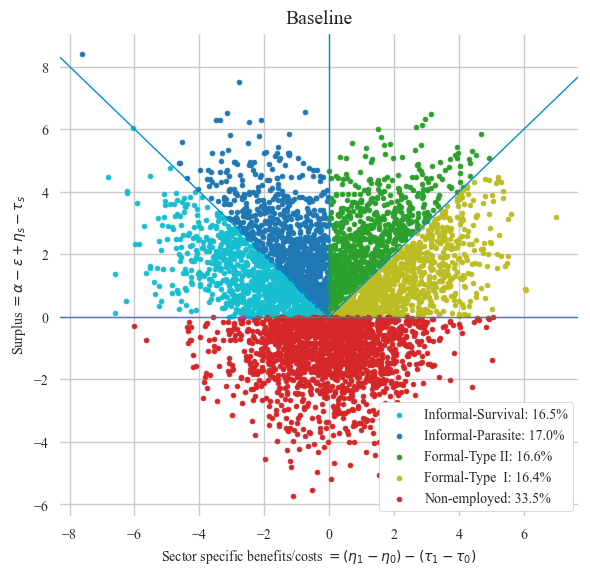

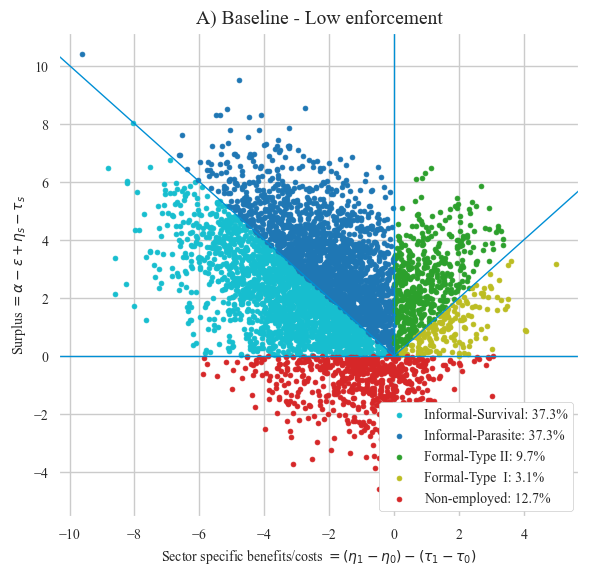

In [8]:
params = [{'d_alpha': 0, 'd_tau0': 0, 'd_tau1': 0, 'title':'Baseline'},
          {'d_alpha': 0, 'd_tau0':-2, 'd_tau1': 0, 'title':'A) Baseline - Low enforcement'},
        #   {'d_alpha': 0, 'd_tau0':+2, 'd_tau1': 0, 'title':'B) Baseline - High enforcement'},
        #   {'d_alpha':-2, 'd_tau0': 0, 'd_tau1': 0, 'title':'A) Low productivity'},
        #   {'d_alpha':-2, 'd_tau0':-2, 'd_tau1': 0, 'title':'A) Low productivity - Low enforcement'},
        #   {'d_alpha':-2, 'd_tau0':+2, 'd_tau1': 0, 'title':'B) Low productivity - High enforcement'},
        #   {'d_alpha':+2, 'd_tau0': 0, 'd_tau1': 0, 'title':'B) High productivity'},
         ]
for p in params:
    plot_simulation(array, save=False, **p)
    plt.show()